In [ ]:
!git clone https://github.com/zonour97/Antidepressant_discontinuation.git

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
%matplotlib inline

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
%matplotlib inline

In [ ]:
path = "/content/Antidepressant_discontinuation/"

In [ ]:
# PsyTAR_dataset.xlsx
# ADR_UM1_673_variables.xlsx
# entity_type_of_UMLS1.xlsx

# Unique patient’s expression and UMLS concepts

In [ ]:
df_psytar = pd.read_excel(path + "PsyTAR_dataset.xlsx", sheet_name="ADR_Mapped")
df_psytar['ADRs'] = df_psytar['ADRs'].astype(str).convert_dtypes(str)
df_psytar = df_psytar[df_psytar['ADRs'] != "nan"]
df_psytar["ADRs_regular"] = df_psytar["ADRs"].apply(lambda x: x.strip().lower().capitalize())
df_psytar_unique_ADR = df_psytar.drop_duplicates('ADRs_regular')
df_psytar_unique_ADR['entity_type'] = df_psytar_unique_ADR['entity_type'].replace("social impact", "Functional problems")
df_psytar_unique_ADR["entity_type"] = df_psytar_unique_ADR["entity_type"].apply(lambda x: x.capitalize())
entity_type = ["Physiological", "Psychological", "Cognitive", "Functional problems"]
for entity in entity_type:
    cont_ent = df_psytar_unique_ADR[df_psytar_unique_ADR['entity_type']==entity].shape[0]
    print(entity, ":", cont_ent)

Physiological : 2048
Psychological : 795
Cognitive : 197
Functional problems : 80


# Organise ssri and snri of ADR_UMLS1 variables

In [ ]:
df_psytar = pd.read_excel(path + "PsyTAR_dataset.xlsx", sheet_name="Sentence_Labeling")
df_psytar = df_psytar.iloc[:-1, :][["drug_id", "category"]]
df_psytar

,drug_id,category
0,lexapro.1,ssri
1,lexapro.1,ssri
2,lexapro.1,ssri
3,lexapro.1,ssri
4,lexapro.1,ssri
...,...,...
6004,effexorXR.228,snri
6005,effexorXR.228,snri
6006,effexorXR.228,snri
6007,effexorXR.228,snri


In [ ]:
df_ssri_snri = df_psytar.groupby(['drug_id', 'category'], as_index=False, sort=False).mean()
df_ssri_snri

,drug_id,category
0,lexapro.1,ssri
1,lexapro.2,ssri
2,lexapro.3,ssri
3,lexapro.4,ssri
4,lexapro.5,ssri
...,...,...
886,effexorXR.224,snri
887,effexorXR.225,snri
888,effexorXR.226,snri
889,effexorXR.227,snri


In [ ]:
df_ADR_UM1 = pd.read_excel(path + "ADR_UM1_673_variables.xlsx")
df_ADR_UM1 = pd.merge(df_ssri_snri, df_ADR_UM1, on="drug_id")
df_ADR_UM1

,drug_id,category,DXD-Stop,Abdominal bloating,Abdominal discomfort,Abdominal mass,Abdominal pain,Abdominal rigidity,Abnormal behavior,Abnormal blood pressure,...,Weakness,Weight decreased,Weight fluctuates,Weight gain,Weird feeling,Withdrawn,Xerostomia,Yawning,Yawning excessive,Yelling
0,lexapro.1,ssri,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,lexapro.2,ssri,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lexapro.3,ssri,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lexapro.4,ssri,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lexapro.5,ssri,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,effexorXR.224,snri,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
887,effexorXR.225,snri,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,effexorXR.226,snri,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
889,effexorXR.227,snri,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# step1 drug discontinuation
df_ADR_UM1 = df_ADR_UM1[df_ADR_UM1['DXD-Stop']==1]
# step2 ssri and snri
df_ADR_UM1_ssri = df_ADR_UM1[df_ADR_UM1['category']=='ssri']
df_ADR_UM1_snri = df_ADR_UM1[df_ADR_UM1['category']=='snri']
# Count of ADR_UMLS1 for ssri
df_UMLS1_ssri_count = df_ADR_UM1_ssri.groupby('category').sum().reset_index(drop=True).drop("DXD-Stop", axis=1).T
df_UMLS1_ssri_count = df_UMLS1_ssri_count.reset_index().rename(columns={0:"count", "index":"ADR_UMLS1"})
df_UMLS1_ssri_count['unique_count'] = df_UMLS1_ssri_count['count'].apply(lambda x:1 if x > 1 else x)
# Count of ADR_UMLS1 for snri
df_UMLS1_snri_count = df_ADR_UM1_snri.groupby('category').sum().reset_index(drop=True).drop("DXD-Stop", axis=1).T
df_UMLS1_snri_count = df_UMLS1_snri_count.reset_index().rename(columns={0:"count", "index":"ADR_UMLS1"})
df_UMLS1_snri_count['unique_count'] = df_UMLS1_snri_count['count'].apply(lambda x:1 if x > 1 else x)

In [ ]:
# SSRI
df_UMLS1_ssri_count['count'].sum(), df_UMLS1_ssri_count['unique_count'].sum()

(615, 256)

In [ ]:
# SNRI
df_UMLS1_snri_count['count'].sum(), df_UMLS1_snri_count['unique_count'].sum()

(787, 316)

In [ ]:
df_ent_type = pd.read_excel(path + "entity_type_of_UMLS1.xlsx")
df_ent_type['entity_type'] = df_ent_type['entity_type'].replace('social impact', 'functional problems')
df_ent_type['entity_type'] = df_ent_type['entity_type'].apply(lambda x:x.capitalize())
df_ent_type

,ADR_UMLS1,entity_type
0,Abdominal bloating,Physiological
1,Abdominal discomfort,Physiological
2,Abdominal mass,Physiological
3,Abdominal pain,Physiological
4,Abdominal rigidity,Physiological
...,...,...
668,Withdrawn,Functional problems
669,Xerostomia,Physiological
670,Yawning,Physiological
671,Yawning excessive,Physiological


In [ ]:
df_ent_type['entity_type'].value_counts()

Physiological          411
Psychological          188
Cognitive               46
Functional problems     28
Name: entity_type, dtype: int64

In [ ]:
entity_order = ['Physiological', 'Psychological', 'Cognitive', 'Functional problems']

## ssri

### Top 5 each entity type

In [ ]:
df_UMLS1_var_ssri = pd.merge(df_ent_type, df_UMLS1_ssri_count, on='ADR_UMLS1')
df_UMLS1_var_ssri = df_UMLS1_var_ssri.sort_values(['entity_type', 'count'], ascending=False).reset_index(drop=True)
df_UMLS1_var_ssri_organ = pd.DataFrame()
df_top5_ssri = pd.DataFrame()
for ent in entity_order:
    df_temp = df_UMLS1_var_ssri[df_UMLS1_var_ssri["entity_type"]==ent]
    df_temp["percentage"] = (df_temp["count"] / df_ADR_UM1_ssri.shape[0]) * 100
    df_UMLS1_var_ssri_organ = pd.concat([df_UMLS1_var_ssri_organ, df_temp])
    df_top5_ssri = pd.concat([df_top5_ssri, df_temp.iloc[:5, :]])
df_UMLS1_var_ssri_organ = df_UMLS1_var_ssri_organ.reset_index(drop=True)
df_top5_ssri = df_top5_ssri.reset_index(drop=True)
df_top5_ssri = df_top5_ssri.rename(columns={"percentage":"Percentage(%)", "count":"Count", "entity_type":"Entity type"})
df_top5_ssri["Category"] = "SSRI"
df_top5_ssri

,ADR_UMLS1,Entity type,Count,unique_count,Percentage(%),Category
0,Weight gain,Physiological,25,1,23.584906,SSRI
1,Lack of libido,Physiological,18,1,16.981132,SSRI
2,Sleeplessness,Physiological,17,1,16.037736,SSRI
3,Fatigue,Physiological,16,1,15.094340,SSRI
4,Headache,Physiological,15,1,14.150943,SSRI
5,Anxiety,Psychological,16,1,15.094340,SSRI
6,Depressed mood,Psychological,10,1,9.433962,SSRI
7,Detailed recall of dream,Psychological,7,1,6.603774,SSRI
8,Apathy,Psychological,6,1,5.660377,SSRI
9,Felt like a zombie,Psychological,5,1,4.716981,SSRI


In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() - 0.25
                value = np.round(p.get_width(), 2)
                if str(_x)=="nan":
                    continue
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - 0.25
                value = np.round(p.get_width(), 2)
                if str(_x)=="nan":
                    continue
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

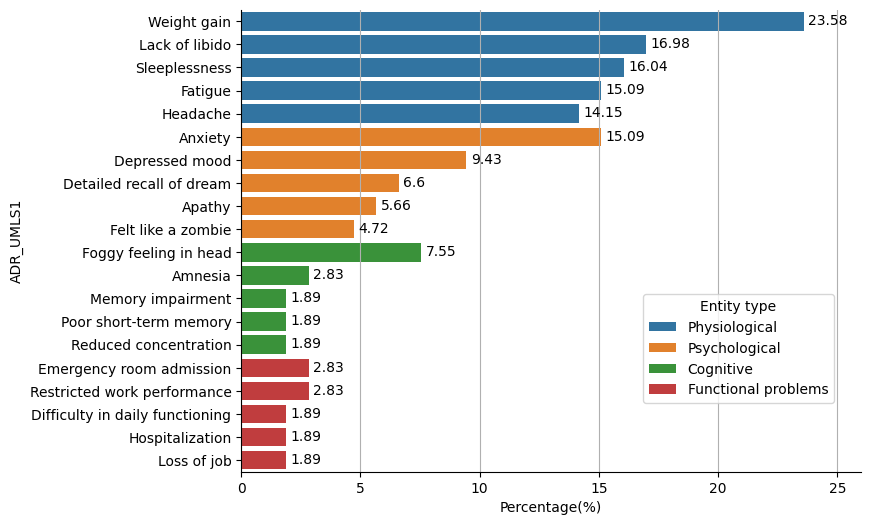

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Percentage(%)", y="ADR_UMLS1", hue="Entity type", data=df_top5_ssri, dodge=False, )
show_values_on_bars(ax, h_v="h", space=0.2)
ax.yaxis.grid(True)
# ax.legend(loc="lower right")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 26)
ax.grid()
ax.legend(bbox_to_anchor=(0.967, 0.4), title="Entity type")
plt.savefig("ssri_1000.png", bbox_inches='tight', dpi=1000)
plt.show()

## snri

### Top 5 each entity type

In [ ]:
df_UMLS1_var_snri = pd.merge(df_ent_type, df_UMLS1_snri_count, on='ADR_UMLS1')
df_UMLS1_var_snri = df_UMLS1_var_snri.sort_values(['entity_type', 'count'], ascending=False).reset_index(drop=True)
df_UMLS1_var_snri_organ = pd.DataFrame()
df_top5_snri = pd.DataFrame()
for ent in entity_order:
    df_temp = df_UMLS1_var_snri[df_UMLS1_var_snri["entity_type"]==ent]
    df_temp["percentage"] = (df_temp["count"] / df_ADR_UM1_snri.shape[0]) * 100
    df_UMLS1_var_snri_organ = pd.concat([df_UMLS1_var_snri_organ, df_temp])
    df_top5_snri = pd.concat([df_top5_snri, df_temp.iloc[:5, :]])
df_UMLS1_var_snri_organ = df_UMLS1_var_snri_organ.reset_index(drop=True)
df_top5_snri = df_top5_snri.reset_index(drop=True)
df_top5_snri = df_top5_snri.rename(columns={"percentage":"Percentage(%)", "count":"Count", "entity_type":"Entity type"})
df_top5_snri["Category"] = "SNRI"
df_top5_snri

,ADR_UMLS1,Entity type,Count,unique_count,Percentage(%),Category
0,Sleeplessness,Physiological,22,1,17.460317,SNRI
1,Dizziness,Physiological,21,1,16.666667,SNRI
2,Fatigue,Physiological,19,1,15.079365,SNRI
3,Constipation,Physiological,18,1,14.285714,SNRI
4,Lack of libido,Physiological,18,1,14.285714,SNRI
5,Feeling suicidal (finding),Psychological,10,1,7.936508,SNRI
6,Anxiety,Psychological,9,1,7.142857,SNRI
7,Mood swings,Psychological,9,1,7.142857,SNRI
8,Depressed mood,Psychological,8,1,6.349206,SNRI
9,Loss of capacity to feel emotions,Psychological,8,1,6.349206,SNRI


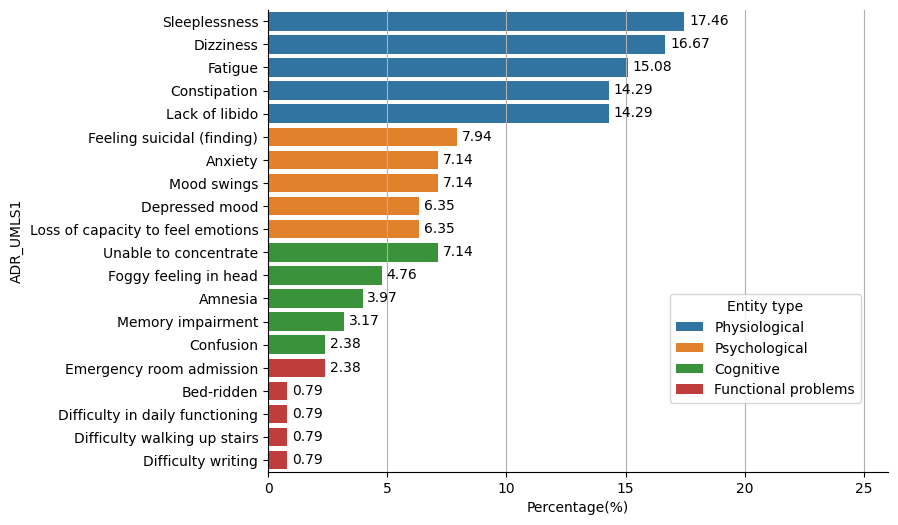

In [ ]:
plt.figure(figsize=(8, 6), )
ax = sns.barplot(x="Percentage(%)", y="ADR_UMLS1", hue="Entity type", data=df_top5_snri, dodge=False, )
show_values_on_bars(ax, h_v="h", space=0.2)
ax.yaxis.grid(True)
# ax.legend(loc="lower right")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 26)
ax.grid()
ax.legend(bbox_to_anchor=(0.967, 0.4), title="Entity type")
plt.savefig("snri_1000.png", bbox_inches='tight', dpi=1000)
plt.show()

## ADR percentge of each entity type for SSRI and SNRI

In [ ]:
df_UMLS1_var_ssri

,ADR_UMLS1,entity_type,count,unique_count
0,Anxiety,Psychological,16,1
1,Depressed mood,Psychological,10,1
2,Detailed recall of dream,Psychological,7,1
3,Apathy,Psychological,6,1
4,Felt like a zombie,Psychological,5,1
...,...,...,...,...
668,Stuttering,Cognitive,0,0
669,Talkativeness,Cognitive,0,0
670,Unable to control emotions,Cognitive,0,0
671,Unable to speak,Cognitive,0,0


In [ ]:
df_UMLS1_var_snri

,ADR_UMLS1,entity_type,count,unique_count
0,Feeling suicidal (finding),Psychological,10,1
1,Anxiety,Psychological,9,1
2,Mood swings,Psychological,9,1
3,Depressed mood,Psychological,8,1
4,Loss of capacity to feel emotions,Psychological,8,1
...,...,...,...,...
668,Reduced concentration,Cognitive,0,0
669,Speech problem,Cognitive,0,0
670,Talkativeness,Cognitive,0,0
671,Unable to control emotions,Cognitive,0,0


In [ ]:
df_ssri_snri_diagram = pd.DataFrame(columns=['Entity type', 'Count', 'Percentage(%)', 'Category'])
for i, entity in enumerate(entity_order):
    df_ssri_snri_diagram.loc[i*2, 'Entity type'] = entity
    count_ssri = df_UMLS1_var_ssri[df_UMLS1_var_ssri["entity_type"]==entity]["count"].sum()
    df_ssri_snri_diagram.loc[i*2, 'Count'] = count_ssri
    df_ssri_snri_diagram.loc[i*2, 'Percentage(%)'] = (count_ssri / df_UMLS1_var_ssri['count'].sum()) * 100
    df_ssri_snri_diagram.loc[i*2, 'Category'] = "SSRI_" + entity[:2]
    ##############################################################################3
    df_ssri_snri_diagram.loc[(i*2)+1, 'Entity type'] = entity
    count_snri = df_UMLS1_var_snri[df_UMLS1_var_snri["entity_type"]==entity]["count"].sum()
    df_ssri_snri_diagram.loc[(i*2)+1, 'Count'] = df_UMLS1_var_snri[df_UMLS1_var_snri["entity_type"]==entity]["count"].sum()
    df_ssri_snri_diagram.loc[(i*2)+1, 'Percentage(%)'] = (count_snri / df_UMLS1_var_snri['count'].sum()) * 100
    df_ssri_snri_diagram.loc[(i*2)+1, 'Category'] = "SNRI_" + entity[:2]

In [ ]:
# df_ssri_snri_diagram.to_excel("/content/drive/MyDrive/Ali_paper/Development/Data/ssri_snri_entity_type_percentage.xlsx", index=False)

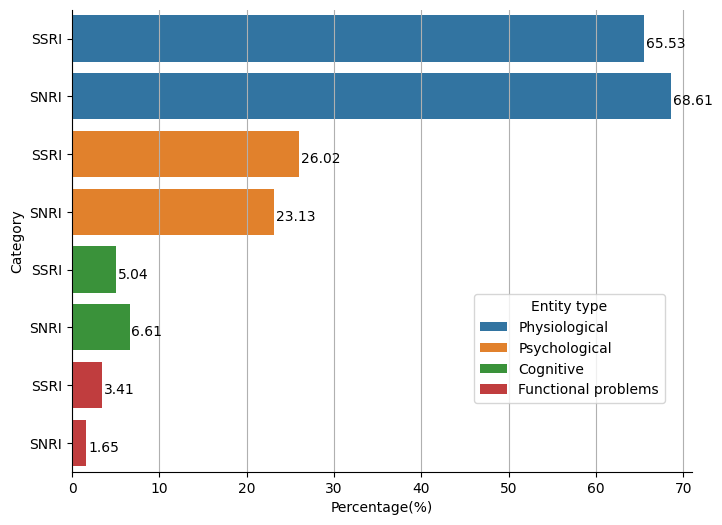

In [ ]:
plt.figure(figsize=(8, 6), )
ax = sns.barplot(x="Percentage(%)", y="Category", hue="Entity type", data=+df_ssri_snri_diagram, dodge=False)
show_values_on_bars(ax, h_v="h", space=0.2)
ax.yaxis.grid(True)
# ax.legend(loc="lower right")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 71)
ax.set_yticklabels([ent[:4] for ent in df_ssri_snri_diagram["Category"].tolist()])
ax.grid()
ax.legend(bbox_to_anchor=(0.967, 0.4), title="Entity type")
plt.savefig("snri_snri_diagram_1000.png", bbox_inches='tight', dpi=1000)

plt.show()

# Organise ADR, ADR-A, EF-INF, KN, DXD-Forgot, Rating

In [ ]:
df_sentence = pd.read_excel(path + "annotated_sentence_level.xlsx").drop("Unnamed: 0", axis=1).iloc[:-1, :]
df_sentence.loc[:, "ADR":"rating"] = df_sentence.loc[:, "ADR":"rating"].fillna(0)
df_sentence

,drug_id,sentence_index,sentences,ADR,EF,INF,KN,ADR-PA,ADR-NA,DXD-dec,DXD-S-W,DXD-F,rating
0,lexapro.1,1.0,"extreme weight gain, short-term memory loss, h...",1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,lexapro.1,2.0,I am detoxing from Lexapro now.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,lexapro.1,3.0,I slowly cut my dosage over several months and...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,lexapro.1,4.0,I am now 10 days completely off and OMG is it ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,lexapro.1,5.0,"I have flu-like symptoms, dizziness, major moo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,effexorXR.228,14.0,I have not had to increase my dosage as of yet.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
6005,effexorXR.228,15.0,I'm hoping to be able to stay on the 75 mgs fo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
6006,effexorXR.228,16.0,Reading about the withdrawals is a little scar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
6007,effexorXR.228,17.0,Effexor has made a huge difference in my life ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0


## ADR

In [ ]:
df_ADR = df_sentence.groupby(by="drug_id", as_index=False, sort=False)["ADR"].max()
df_ADR['ADR'].value_counts()

1.0    818
0.0     73
Name: ADR, dtype: int64

## ADR-A

In [ ]:
# 0:No-information, 1:Low, 2:Medium, 3:High

In [ ]:
df_sentence["ADR-NA"] = df_sentence["ADR-NA"].replace(1, 2)
df_sentence["ADR-A"] = df_sentence["ADR-PA"] + df_sentence["ADR-NA"]

In [ ]:
def combine_ADR_ADR_A(X):
    x, y = X[0], X[1]
    if x==0 and y==0:
        return 0
    elif (x==0 and y==1) or (x==1 and y==1):
        return 1
    elif x==1 and y==0:
        return 2
    elif (x==0 and y==2) or (x==1 and y==2):
        return 3

In [ ]:
df_sentence_ADR_A = df_sentence.copy()
df_sentence_ADR_A["ADR-A"] = df_sentence[["ADR", "ADR-A"]].apply(combine_ADR_ADR_A, axis=1)
df_sentence_ADR_A["ADR-A"].value_counts()

0    3625
2    1004
3     976
1     404
Name: ADR-A, dtype: int64

In [ ]:
df_ADR_A = df_sentence_ADR_A.groupby(by=["drug_id"], as_index=False, sort=False)["ADR-A"].max()
df_ADR_A["ADR-A"].value_counts()

3    483
2    281
1     92
0     35
Name: ADR-A, dtype: int64

## EF-INF

In [ ]:
# EF-INF
# No_information:0, EF:1, INF:-1, Partial effectiveness:2

In [ ]:
def get_EF_INF(x):
    if x[0]==1 and x[1]==1:
        return 2
    elif x[0]==1 and x[1]==0:
        return 1
    elif x[0]==0 and x[1]==1:
        return -1
    else:
        return 0
df_EF_INF = df_sentence.groupby(by="drug_id", as_index=False, sort=False)["EF", "INF"].max()
df_EF_INF["EF-INF"] = df_EF_INF[["EF", "INF"]].apply(get_EF_INF, axis=1)
df_EF_INF = df_EF_INF[["drug_id", "EF-INF"]]
df_EF_INF["EF-INF"].value_counts()

 1    404
 0    239
-1    133
 2    115
Name: EF-INF, dtype: int64

## KN

In [ ]:
df_KN = df_sentence.groupby(by="drug_id", as_index=False, sort=False)["KN"].max()
df_KN['KN'].value_counts()

0.0    831
1.0     60
Name: KN, dtype: int64

## DXD-Forgot

In [ ]:
df_DXD_F = df_sentence.groupby(by="drug_id", as_index=False, sort=False)["DXD-F"].max()
df_DXD_F['DXD-F'].value_counts()

0.0    843
1.0     48
Name: DXD-F, dtype: int64

## Rating

In [ ]:
df_rating = df_sentence.groupby(by="drug_id", as_index=False, sort=False)["rating"].max()
df_rating['rating'].value_counts()

5.0    219
4.0    210
1.0    201
3.0    157
2.0    104
Name: rating, dtype: int64

## Aggregate all of the variables

In [ ]:
data_frames = [df_ADR, df_ADR_A, df_EF_INF, df_KN, df_DXD_F, df_rating, df_ADR_UM1[["drug_id", "category", "DXD-Stop"]]]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['drug_id'], how='inner'), data_frames).fillna('void')
df_merged

,drug_id,ADR,ADR-A,EF-INF,KN,DXD-F,rating,category,DXD-Stop
0,lexapro.1,1.0,3,0,1.0,0.0,1.0,ssri,1.0
1,lexapro.2,1.0,3,-1,0.0,0.0,1.0,ssri,1.0
2,lexapro.3,1.0,3,0,0.0,0.0,1.0,ssri,1.0
3,lexapro.4,1.0,3,-1,0.0,0.0,1.0,ssri,1.0
4,lexapro.5,1.0,3,-1,1.0,0.0,1.0,ssri,1.0
...,...,...,...,...,...,...,...,...,...
886,effexorXR.224,1.0,2,1,0.0,1.0,5.0,snri,0.0
887,effexorXR.225,1.0,2,1,0.0,0.0,5.0,snri,0.0
888,effexorXR.226,1.0,3,1,0.0,1.0,5.0,snri,0.0
889,effexorXR.227,1.0,1,1,0.0,0.0,5.0,snri,0.0


In [ ]:
df_merged.to_excel(path+"important_patient_variables_groupby_by_id.xlsx", index=False)

In [ ]:
df_merged_new = deepcopy(df_merged)
df_merged_new['drug_id'] = df_merged_new['drug_id'].apply(lambda x:x.capitalize())
df_merged_new = df_merged_new[['drug_id', 'category', 'rating', 'ADR', 'ADR-A', 'EF-INF', 'KN', 'DXD-F', 'DXD-Stop']]
df_merged_new.to_excel(path + 'Aggregated_PsyRisk_dataset.xlsx', index=False)

# Organise ssri and snri of important vaiables

In [ ]:
df_imp_dis =  df_merged[df_merged['DXD-Stop']==1]
df_imp_dis_ssri = df_imp_dis[df_imp_dis['category']=='ssri']
df_imp_dis_snri = df_imp_dis[df_imp_dis['category']=='snri']

## ssri

In [ ]:
df_imp_dis_ssri

,drug_id,ADR,ADR-A,EF-INF,KN,DXD-F,rating,category,DXD-Stop
0,lexapro.1,1.0,3,0,1.0,0.0,1.0,ssri,1.0
1,lexapro.2,1.0,3,-1,0.0,0.0,1.0,ssri,1.0
2,lexapro.3,1.0,3,0,0.0,0.0,1.0,ssri,1.0
3,lexapro.4,1.0,3,-1,0.0,0.0,1.0,ssri,1.0
4,lexapro.5,1.0,3,-1,1.0,0.0,1.0,ssri,1.0
...,...,...,...,...,...,...,...,...,...
101,zoloft.185,1.0,2,1,0.0,0.0,5.0,ssri,1.0
102,zoloft.194,1.0,3,1,0.0,0.0,5.0,ssri,1.0
103,zoloft.207,1.0,1,2,0.0,0.0,5.0,ssri,1.0
104,zoloft.208,1.0,3,1,0.0,0.0,5.0,ssri,1.0


### ADR

In [ ]:
print(df_imp_dis_ssri['ADR'].value_counts())
print("**************************")
print(df_imp_dis_ssri['ADR'].value_counts(normalize=True) * 100)

1.0    102
0.0      4
Name: ADR, dtype: int64
**************************
1.0    96.226415
0.0     3.773585
Name: ADR, dtype: float64


### ADR-A

In [ ]:
# 0:No-information, 1:Low, 2:Medium, 3:High

In [ ]:
print(df_imp_dis_ssri['ADR-A'].value_counts())
print("**************************")
print(df_imp_dis_ssri['ADR-A'].value_counts(normalize=True) * 100)

3    82
2    19
1     3
0     2
Name: ADR-A, dtype: int64
**************************
3    77.358491
2    17.924528
1     2.830189
0     1.886792
Name: ADR-A, dtype: float64


### EF-INF

In [ ]:
# EF-INF
# No_information:0, EF:1, INF:-1, Partial effectiveness:2

In [ ]:
print(df_imp_dis_ssri['EF-INF'].value_counts())
print("**************************")
print(df_imp_dis_ssri['EF-INF'].value_counts(normalize=True) * 100)

 1    44
 0    25
 2    21
-1    16
Name: EF-INF, dtype: int64
**************************
 1    41.509434
 0    23.584906
 2    19.811321
-1    15.094340
Name: EF-INF, dtype: float64


### KN

In [ ]:
print(df_imp_dis_ssri['KN'].value_counts())
print("**************************")
print(df_imp_dis_ssri['KN'].value_counts(normalize=True) * 100)

0.0    98
1.0     8
Name: KN, dtype: int64
**************************
0.0    92.45283
1.0     7.54717
Name: KN, dtype: float64


### DXD-Forgot

In [ ]:
print(df_imp_dis_ssri['DXD-F'].value_counts())
print("**************************")
print(df_imp_dis_ssri['DXD-F'].value_counts(normalize=True) * 100)

0.0    103
1.0      3
Name: DXD-F, dtype: int64
**************************
0.0    97.169811
1.0     2.830189
Name: DXD-F, dtype: float64


## snri

In [ ]:
df_imp_dis_snri

,drug_id,ADR,ADR-A,EF-INF,KN,DXD-F,rating,category,DXD-Stop
106,cymbalta.6,1.0,3,-1,0.0,0.0,1.0,snri,1.0
107,cymbalta.7,1.0,2,0,0.0,0.0,1.0,snri,1.0
108,cymbalta.8,1.0,3,0,1.0,0.0,1.0,snri,1.0
109,cymbalta.11,1.0,3,-1,1.0,0.0,1.0,snri,1.0
110,cymbalta.14,1.0,3,2,0.0,0.0,1.0,snri,1.0
...,...,...,...,...,...,...,...,...,...
227,effexorXR.212,1.0,3,1,0.0,0.0,5.0,snri,1.0
228,effexorXR.214,0.0,1,1,0.0,1.0,5.0,snri,1.0
229,effexorXR.219,1.0,2,1,0.0,0.0,5.0,snri,1.0
230,effexorXR.220,1.0,3,1,0.0,0.0,5.0,snri,1.0


### ADR

In [ ]:
print(df_imp_dis_snri['ADR'].value_counts())
print("**************************")
print(df_imp_dis_snri['ADR'].value_counts(normalize=True) * 100)

1.0    116
0.0     10
Name: ADR, dtype: int64
**************************
1.0    92.063492
0.0     7.936508
Name: ADR, dtype: float64


### ADR-A

In [ ]:
# 0:No-information, 1:Low, 2:Medium, 3:High

In [ ]:
print(df_imp_dis_snri['ADR-A'].value_counts())
print("**************************")
print(df_imp_dis_snri['ADR-A'].value_counts(normalize=True) * 100)

3    83
2    31
1     7
0     5
Name: ADR-A, dtype: int64
**************************
3    65.873016
2    24.603175
1     5.555556
0     3.968254
Name: ADR-A, dtype: float64


### EF-INF

In [ ]:
# EF-INF
# No_information:0, EF:1, INF:-1, Partial effectiveness:2

In [ ]:
print(df_imp_dis_snri['EF-INF'].value_counts())
print("**************************")
print(df_imp_dis_snri['EF-INF'].value_counts(normalize=True) * 100)

 1    42
 0    35
-1    33
 2    16
Name: EF-INF, dtype: int64
**************************
 1    33.333333
 0    27.777778
-1    26.190476
 2    12.698413
Name: EF-INF, dtype: float64


### KN

In [ ]:
print(df_imp_dis_snri['KN'].value_counts())
print("**************************")
print(df_imp_dis_snri['KN'].value_counts(normalize=True) * 100)

0.0    110
1.0     16
Name: KN, dtype: int64
**************************
0.0    87.301587
1.0    12.698413
Name: KN, dtype: float64


### DXD-Forgot

In [ ]:
print(df_imp_dis_snri['DXD-F'].value_counts())
print("**************************")
print(df_imp_dis_snri['DXD-F'].value_counts(normalize=True) * 100)

0.0    121
1.0      5
Name: DXD-F, dtype: int64
**************************
0.0    96.031746
1.0     3.968254
Name: DXD-F, dtype: float64


# Most informative ADRs identified by the JMIM method

In [ ]:
df_673 = pd.read_excel("/content/drive/MyDrive/Ali_paper/Development/Data/ADR_UM1_673_variables.xlsx")
y = df_673['DXD-Stop'].to_numpy()
df_673_new = df_673.drop(["drug_id", "DXD-Stop"], axis=1)
X = df_673_new.to_numpy()

In [ ]:
# Oversampling X for jmim feature extractor
X1 = X[np.where(np.sum(X, axis=1)!=0)]
y1 = y[np.where(np.sum(X, axis=1)!=0)]
# Standard Scaler
t = StandardScaler()
X1_t = t.fit_transform(X1)
#Resampling
oversample = SMOTE(random_state=50)
X_new, y_new = oversample.fit_resample(X1_t, y1)

## JMIM

In [ ]:
!git clone https://github.com/danielhomola/mifs.git
%cd /content/mifs
!pip install -q .
%cd /content

fatal: destination path 'mifs' already exists and is not an empty directory.
/content/mifs
  Preparing metadata (setup.py) ... done
/content


In [ ]:
# If you have error, changing sklearn.feature_selection.base to sklearn.feature_selection._base in mifs.py file.
import mifs

In [ ]:
#Normalize
ratio = np.sqrt(np.sum(np.square(X_new), axis=1))
ratio = ratio.reshape(ratio.shape[0], 1)
X_new_n = X_new/ratio

In [ ]:
MIFS1 = mifs.MutualInformationFeatureSelector(method='JMIM', k=7, n_features='auto', verbose=2)
MIFS1.fit(X_new_n, y_new)

Auto selected feature #1 : 666, JMIM : 0.05612532307521789
Auto selected feature #2 : 167, JMIM : 0.12171592014647592
Auto selected feature #3 : 205, JMIM : 0.08840320608104113
Auto selected feature #4 : 549, JMIM : 0.08158891845788885
Auto selected feature #5 : 364, JMIM : 0.07841643593672609
Auto selected feature #6 : 425, JMIM : 0.07505082811997843
Auto selected feature #7 : 341, JMIM : 0.07218571280859765
Auto selected feature #8 : 290, JMIM : 0.0703117632588075
Auto selected feature #9 : 135, JMIM : 0.06747005855131682
Auto selected feature #10 : 431, JMIM : 0.06323665762183062
Auto selected feature #11 : 259, JMIM : 0.06101296197578954
Auto selected feature #12 : 45, JMIM : 0.060259927019502335
Auto selected feature #13 : 658, JMIM : 0.05959148853744445
Auto selected feature #14 : 465, JMIM : 0.05806206283223592
Auto selected feature #15 : 249, JMIM : 0.05783697616028993
Auto selected feature #16 : 193, JMIM : 0.056633169014126405


MutualInformationFeatureSelector(k=7, method='JMIM', verbose=2)

In [ ]:
df_jmim_fs = df_673_new.iloc[:, MIFS1.ranking_]
df_jmim_fs_to_export = df_jmim_fs.copy()
df_jmim_fs_to_export[["drug_id", "DXD-Stop"]] = df_673[["drug_id", "DXD-Stop"]]
df_jmim_fs_to_export.to_excel(path+'Most_informative_ADRs_identified_by_the_JMIM_method.xlsx', index=False)

## Plot figure

In [ ]:
selected_feature = df_jmim_fs.columns.tolist()
df_entity = pd.read_excel("/content/drive/MyDrive/Ali_paper/Development/Data/entity_type_of_UMLS1.xlsx")
df_ent = df_entity.set_index("ADR_UMLS1").loc[selected_feature].reset_index()
df_ent = df_ent.rename(columns={"ADR_UMLS1":"Selected ADRs with jmim"})
mi_df = pd.DataFrame()
mi_df["Selected ADRs with jmim"] = selected_feature
mi_df["Mi value"] = MIFS1.mi_
mi_ent_df = pd.merge(df_ent, mi_df, on="Selected ADRs with jmim")
mi_ent_df["entity_type"] = mi_ent_df["entity_type"].replace({'social impact':'Functional problems'})
mi_ent_df["entity_type"] = mi_ent_df["entity_type"].apply(lambda x:x.capitalize())
mi_ent_df = mi_ent_df.rename(columns={'entity_type':'Entity type'})
df_list = []
for ent in mi_ent_df["Entity type"].unique():
    df_list.append(mi_ent_df[mi_ent_df['Entity type']==ent].sort_values(by="Mi value", ascending=False))
df_SeletedADR_jmim = pd.concat(df_list).reset_index(drop=True)
df_SeletedADR_jmim.to_excel('/content/drive/MyDrive/Ali_paper/table_to_csv/selcted_ADR_variables_from_jmim.xlsx', index=False)
df_SeletedADR_jmim

,Selected ADRs with jmim,Entity type,Mi value
0,Dizziness,Physiological,0.121716
1,Excessive body weight gain,Physiological,0.088403
2,Sleeplessness,Physiological,0.081589
3,Lack of libido,Physiological,0.078416
4,Nausea,Physiological,0.075051
5,Increased sweating,Physiological,0.072186
6,Headache,Physiological,0.070312
7,Night sweats,Physiological,0.063237
8,Vomiting,Physiological,0.059591
9,Palpitations,Physiological,0.058062


In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() - 0.25
                value = np.round(p.get_width(), 3)
                if str(_x)=="nan":
                    continue
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - 0.25
                value = np.round(p.get_width(), 3)
                if str(_x)=="nan":
                    continue
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

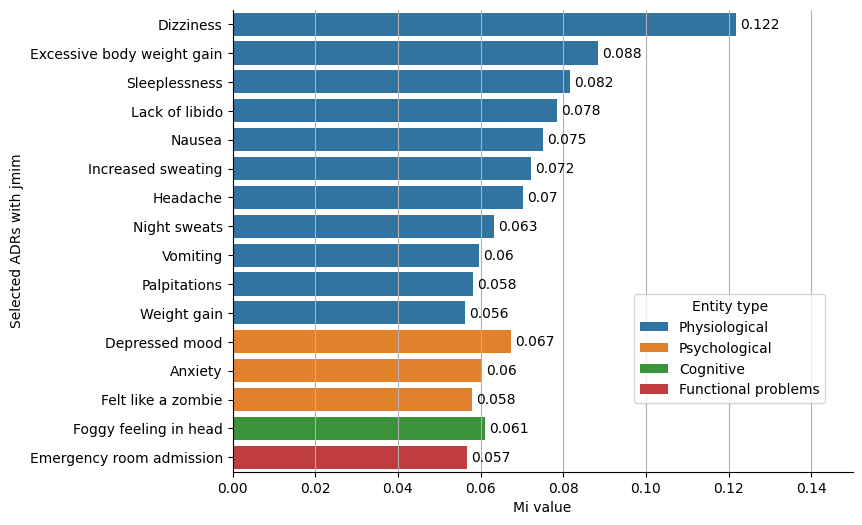

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Mi value", y="Selected ADRs with jmim", hue="Entity type", data=df_SeletedADR_jmim, dodge=False, )
show_values_on_bars(ax, h_v="h", space=0.001)
ax.yaxis.grid(True)
# ax.legend(loc="lower right")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 0.15)
ax.grid()
ax.legend(bbox_to_anchor=(0.967, 0.4), title="Entity type")
plt.savefig("selected_feature_jmim_1000.png", bbox_inches='tight', dpi=1000)
plt.show()